In [1]:
import numpy as np #math library  

import matplotlib.pyplot as plt #plotting library

import scipy.stats as st # library for statistics

## Question 1

In [2]:
import pandas as pd

In [3]:
x = [1, 2, 4, 7, 8]
y = [0.30, 0.15, 0.10, 0.08, 0.37]

In [4]:
data = pd.DataFrame({'Value' : x,
                    'Probability' : y})

Plot the pmf (probability mass function)

<BarContainer object of 5 artists>

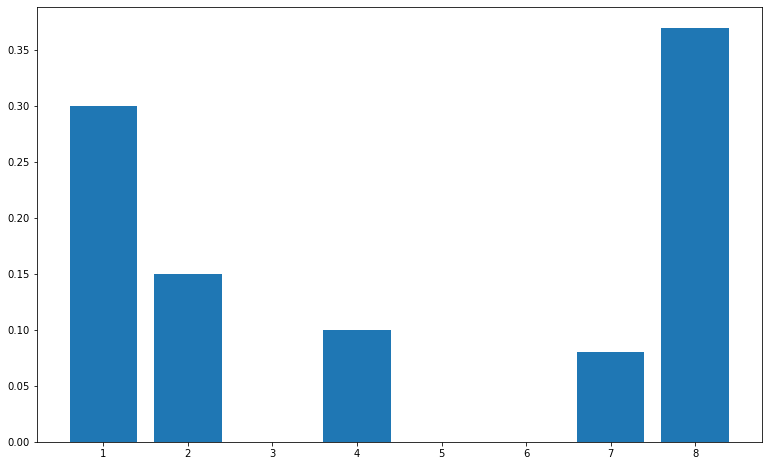

In [5]:
plt.figure(figsize = (13,8))
plt.bar(data['Value'], data['Probability'])

Plot the cdf (cumulative density function)

In [6]:
data['CumSum'] = np.cumsum(np.array(data['Probability']))

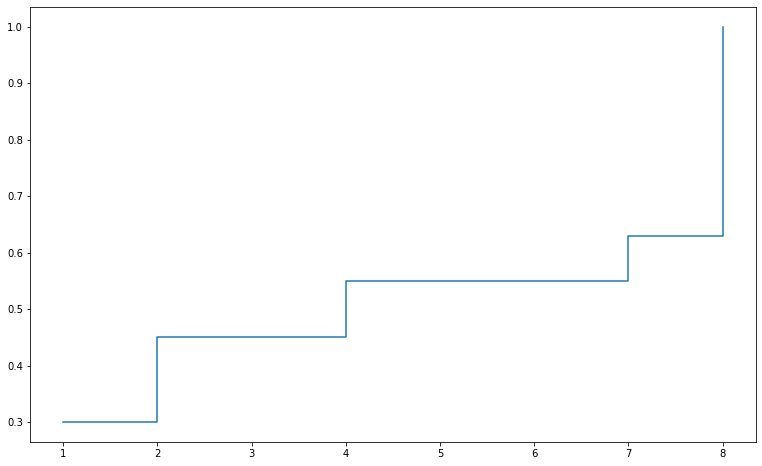

In [7]:
plt.figure(figsize = (13,8))
plt.plot(data['Value'], data['CumSum'], drawstyle='steps-post')

Compute the mean

In [8]:
n = len(data)

In [9]:
data['Product'] = data['Value'] * data['Probability']

In [11]:
mean = np.sum(data['Product'])
print('The mean is' + ' ' + str(mean))

The mean is 4.52


Compute the variance

In [12]:
data['mean'] = mean

In [13]:
data['variance'] = (data['Value'] - data['mean']) ** 2 * data['Probability']

In [16]:
variance = np.sum(data['variance'])

In [17]:
print('Variance is' + ' ' + str(variance))

Variance is 9.6696


Compute the 1st, 2nd, 3rd, 4th moments

In [22]:
# 1st moment is the mean

# 2nd moment
def moment(data, y, col1, col2):
    data['Value' + str(y)] = data[col1] ** y
    data['Moment' + str(y)] = data['Value' + str(y)] * data[col2]
    moment = np.sum(data['Moment' + str(y)])
    return moment

In [23]:
print(moment(data, 1, 'Value', 'Probability'))
print(moment(data, 2, 'Value', 'Probability'))
print(moment(data, 3, 'Value', 'Probability'))
print(moment(data, 4, 'Value', 'Probability'))

4.52
30.1
224.78
1735.9


In [24]:
def central_moment(data, y, col1, col2, col3):
    data['Value_central' + str(y)] = (data[col1] - data[col3]) ** y
    data['Moment_central' + str(y)] = data['Value_central' + str(y)] * data[col2]
    moment_central = np.sum(data['Moment_central' + str(y)])
    return moment_central

In [25]:
print(central_moment(data, 1, 'Value', 'Probability', 'mean'))
print(central_moment(data, 2, 'Value', 'Probability', 'mean')) #this is the variance
print(central_moment(data, 3, 'Value', 'Probability', 'mean'))
print(central_moment(data, 4, 'Value', 'Probability', 'mean'))

4.440892098500626e-16
9.6696
1.3148160000000146
109.40410752


##### What is the skewness coefficient?

The coefficient of skewness is a measure of asymmetry in the distribution. A positive skew indicates a longer tail to the right, while a negative skew indicates a longer tail to the left. A perfectly symmetric distribution, like the normal distribution, has a skew equal to zero.

Compare the pmf and cdf of the theoretical distribution and the generated one.

### Problem 2

In [26]:
# Example for binomial distribution

n_b = 10 #number of consecutive trials
p_b = 0.6 # probability of success
size_b = 1000 # number of experiments run (in our case it shows how many random numbers we want to generate)

In [27]:
n_b_1 = 50 #number of consecutive trials
p_b_1 = 6/50 # probability of success
# size_b = 1000 # number of experiments run (in our case it shows how many random numbers we want to generate)

In [28]:
n_b_2 = 100 #number of consecutive trials
p_b_2 = 0.06 # probability of success

In [29]:
# let's generate numbers from binomial distribution
# here you can change the distribution, just google it
# for example for normal distribtion you would use - st.norm.rvs(...)
data_binom = st.binom.rvs(n = n_b, p = p_b, size = size_b)
data_binom_1 = st.binom.rvs(n = n_b_1, p = p_b_1, size = size_b)
data_binom_2 = st.binom.rvs(n = n_b_2, p = p_b_2, size = size_b)
s = np.random.poisson(6, 1000)

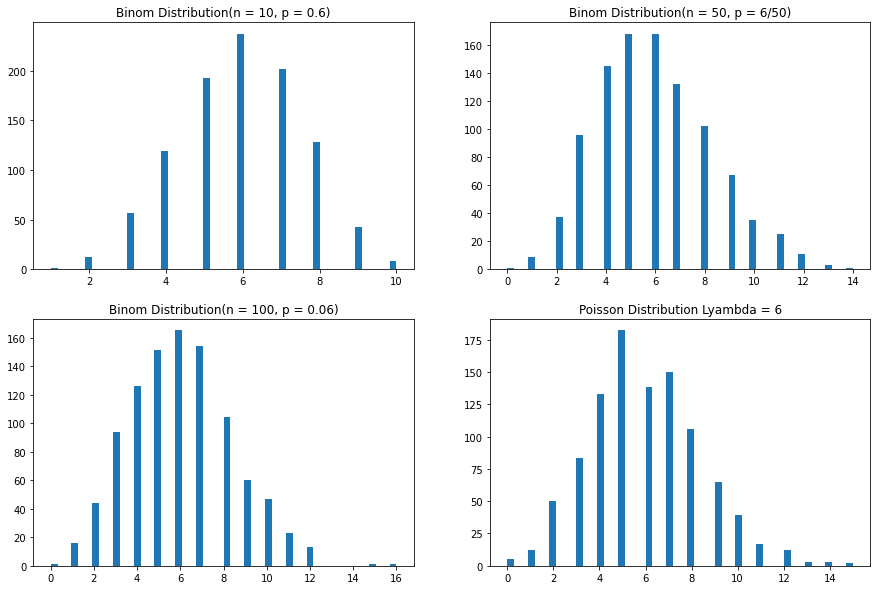

In [30]:
figure, axis = plt.subplots(2, 2, figsize=(15,10))

# For Binom Function
axis[0, 0].hist(data_binom, bins = 50)
axis[0, 0].set_title("Binom Distribution(n = 10, p = 0.6)")
  
# For Binom1 Function
axis[0, 1].hist(data_binom_1, bins = 50)
axis[0, 1].set_title("Binom Distribution(n = 50, p = 6/50)")
  
# For Binom2 Function
axis[1, 0].hist(data_binom_2, bins = 50)
axis[1, 0].set_title("Binom Distribution(n = 100, p = 0.06)")
  
# For Poisson Function
axis[1, 1].hist(s, bins = 50)
axis[1, 1].set_title("Poisson Distribution Lyambda = 6")
  
# Combine all the operations and display

plt.show()

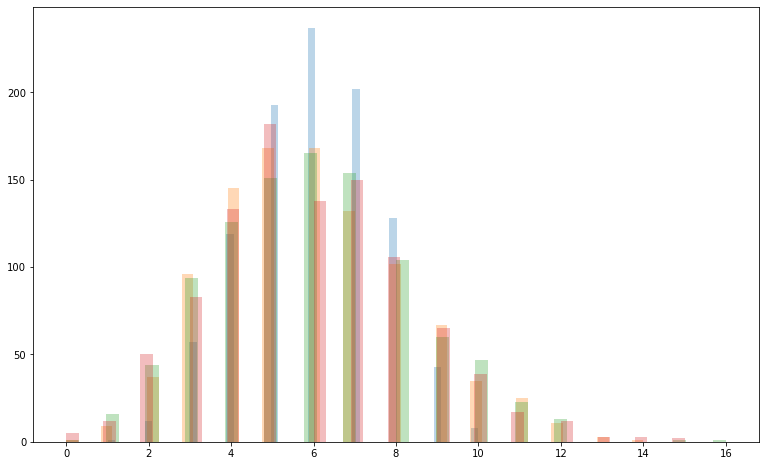

In [55]:
plt.figure(figsize = (13,8))
plt.hist(data_binom, bins = 50, alpha = 0.3)
plt.hist(data_binom_1, bins = 50, alpha = 0.3)
plt.hist(data_binom_2, bins = 50, alpha = 0.3)
plt.hist(s, bins = 50, alpha = 0.3)
plt.show()

In [31]:
mean, var, skew, kurt = st.binom.stats(n = n_b, p = p_b, moments='mvsk')
mean1, var1, skew1, kurt1 = st.binom.stats(n = n_b_1, p = p_b_1, moments='mvsk')
mean2, var2, skew2, kurt2 = st.binom.stats(n = n_b_2, p = p_b_2, moments='mvsk')
mean3, var3, skew3, kurt3 = st.poisson.stats(mu = 6, moments='mvsk')

In [32]:
print(mean, ', ', var, ', ', skew, ', ', kurt)
print(mean1, ', ', var1, ', ', skew1, ', ', kurt1)
print(mean2, ', ', var2, ', ', skew2, ', ', kurt2)
print(mean3, ', ', var3, ', ', skew3, ', ', kurt3)

6.0 ,  2.4000000000000004 ,  -0.12909944487358052 ,  -0.1833333333333333
6.0 ,  5.28 ,  0.3307475463158259 ,  0.0693939393939394
6.0 ,  5.64 ,  0.3705468452692683 ,  0.11730496453900709
6.0 ,  6.0 ,  0.408248290463863 ,  0.16666666666666666


From Comparing the above mentioned 4 different distributions with different parametres, we can see that in case of small sample size the variance is the lowest, but the difference from mean is big. In the other cases the variances is higher but they are close to mean, also skewness and kurtosis are close to each other. The conclusion is that sample size is very important.

#### Problem 1.8

In [33]:
data_new = pd.read_excel('HW4_1.xlsx') #generated data

In [34]:
cumSum = data[['CumSum', 'Value']]

In [35]:
cumSum

,CumSum,Value
0,0.30,1
1,0.45,2
2,0.55,4
3,0.63,7
4,1.00,8


In [36]:
## The conditions for generating numbers using randomly generated numbers from uniform distribution.
## If we look at the cmf will understand teh idea of doing this.

conditions = [
    (data_new['Random number'] < cumSum['CumSum'][0]),
    ((data_new['Random number'] >= cumSum['CumSum'][0]) & (data_new['Random number'] < cumSum['CumSum'][1])),
    ((data_new['Random number'] >= cumSum['CumSum'][1]) & (data_new['Random number'] < cumSum['CumSum'][2])),
    ((data_new['Random number'] >= cumSum['CumSum'][2]) & (data_new['Random number'] < cumSum['CumSum'][3])),
    (data_new['Random number'] >= cumSum['CumSum'][3])& (data_new['Random number'] < cumSum['CumSum'][4])
    ]

In [37]:
values = (cumSum['Value'][0], cumSum['Value'][1], cumSum['Value'][2], cumSum['Value'][3], cumSum['Value'][4])
data_new['Our Dist'] = np.select(conditions, values)
data_new = data_new[['Random number', 'Our Dist']]

(array([294., 145.,   0.,   0.,  84.,   0.,   0.,   0.,  88., 388.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

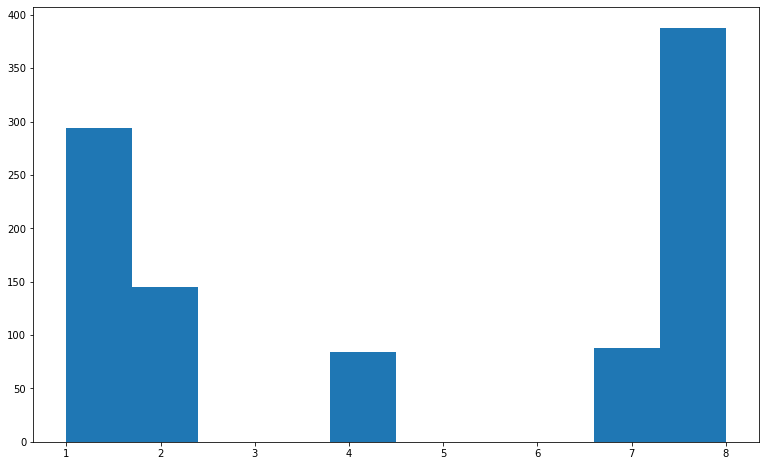

In [38]:
plt.figure(figsize = (13,8))
plt.hist(data_new['Our Dist'])

If we compare pmf of the generated and the theoritical distributions we can see that there is no such difference. But lets look at the other statistics

In [39]:
gen_dist = pd.pivot_table(data = data_new, index=data_new['Our Dist'], aggfunc = 'count')

In [40]:
gen_dist['Prob'] = gen_dist['Random number']/1000

In [41]:
gen_dist = gen_dist.reset_index()

In [42]:
new = pd.concat([data[['Probability', 'Value']], gen_dist], axis = 1)

In [43]:
new

,Probability,Value,Our Dist,Random number,Prob
0,0.30,1,1,294,0.294
1,0.15,2,2,145,0.145
2,0.10,4,4,84,0.084
3,0.08,7,7,88,0.088
4,0.37,8,8,388,0.388


In [44]:
final = new.drop(['Our Dist', 'Random number'], axis = 'columns')

In [45]:
final.columns = ['Th.Probs', 'Value', 'Gen.Probs']

#### Statistics for generated sample

In [46]:
mean = moment(final, 1, 'Value', 'Gen.Probs')
final['Gen.mean'] = mean
print(mean)
print(moment(final, 2, 'Value', 'Gen.Probs'))
print(moment(final, 3, 'Value', 'Gen.Probs'))
print(moment(final, 4, 'Value', 'Gen.Probs'))

4.640000000000001
31.362000000000002
235.67000000000002
1824.654


In [47]:
variance = central_moment(final, 2, 'Value', 'Gen.Probs', 'Gen.mean')
print(central_moment(final, 1, 'Value', 'Gen.Probs', 'Gen.mean'))
print(central_moment(final, 2, 'Value', 'Gen.Probs', 'Gen.mean'))
print(central_moment(final, 3, 'Value', 'Gen.Probs', 'Gen.mean'))
print(central_moment(final, 4, 'Value', 'Gen.Probs', 'Gen.mean'))

0.004639999999999533
9.810870399999999
-0.9944546560000145
110.85213904384


### Statistics for theoritical distribution

In [48]:
mean_th = moment(final, 1, 'Value', 'Th.Probs')
final['Th.mean'] = mean_th
print(mean_th)
print(moment(final, 2, 'Value', 'Th.Probs'))
print(moment(final, 3, 'Value', 'Th.Probs'))
print(moment(final, 4, 'Value', 'Th.Probs'))

4.52
30.1
224.78
1735.9


In [49]:
variance = central_moment(final, 2, 'Value', 'Th.Probs', 'Th.mean')
print(central_moment(final, 1, 'Value', 'Th.Probs', 'Th.mean'))
print(central_moment(final, 2, 'Value', 'Th.Probs', 'Th.mean'))
print(central_moment(final, 3, 'Value', 'Th.Probs', 'Th.mean'))
print(central_moment(final, 4, 'Value', 'Th.Probs', 'Th.mean'))

4.440892098500626e-16
9.6696
1.3148160000000146
109.40410752


If we compare the statistics of our 2 distributions we can see that there is minor difference

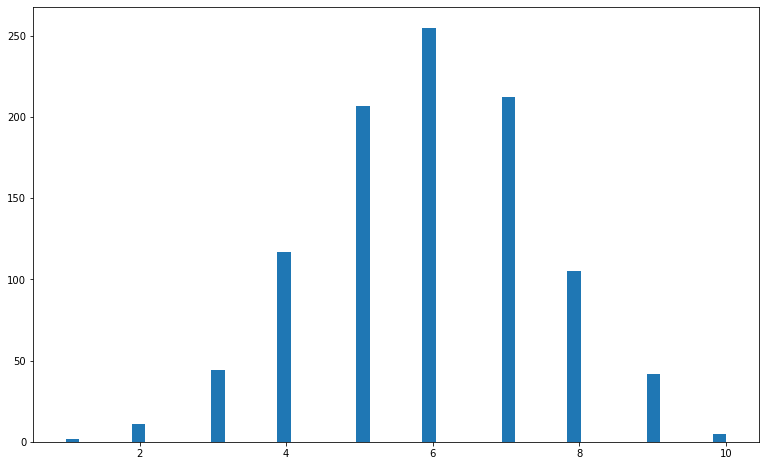

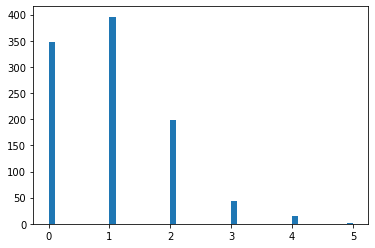

In [58]:
# Example for binomial distribution

n_b = 10 #number of consecutive trials
p_b = 0.6 # probability of success
size_b = 1000 # number of experiments run (in our case it shows how many random numbers we want to generate)

# let's generate numbers from binomial distribution
# here you can change the distribution, just google it
# for example for normal distribtion you would use - st.norm.rvs(...)
data_binom = st.binom.rvs(n = n_b, p = p_b, size = size_b)

# now let's plot our data
plt.figure(figsize = (13,8)); # this one just sets the matplotlib's figure size
plt.hist(data_binom, bins = 50); # plots the histogram, you can change the number of bins
plt.show()

# if you want to add more histograms to the graph
# just copy the same row again, for example
data_binom1 = st.binom.rvs(n = n_b, p = 0.1, size = size_b);  #the same distribution, this time with p = 0.1
plt.hist(data_binom1, bins = 50);
plt.show()

In [2]:
import fitter as ft

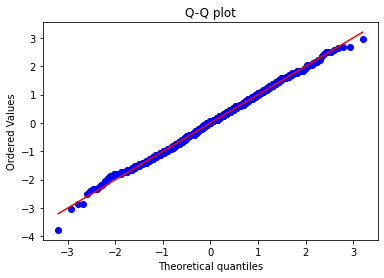

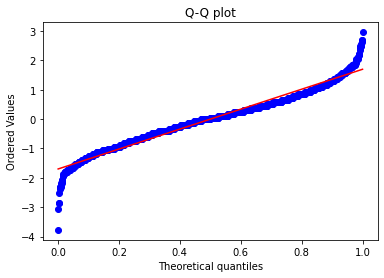

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
n = 1000
p = 0.34
q = 1000
obs = np.random.binomial(n, p, size = q)/n

y = (obs-np.mean(obs))/np.std(obs)

stats.probplot(y, dist="norm", plot=plt)
plt.title("Q-Q plot")
plt.show()
stats.probplot(y, dist="uniform", plot=plt)
plt.title("Q-Q plot")
plt.show()